# Cleanup and Analysis of Suricata Benchmarking Results

## Experiment Definition


According to call on 2019-07-25:

- VNF: Suricata IDS
- parameters:
    - cpu_bw 0.1 - 1.0, step 0.1
    - core pinnig (1 core per container)
    - memory: 1024MB
    - rulset: empty, small, large
    - low sizes (pcaps): smallFlows, bugFlows (tcpreplay -i data -tK --loop 1000)
    - repetitions: 10
    - round time (measurement of one config): 30 seconds
- recorded metrics:
    - suricata_bytes
    - suricata_dropped
    - suricate_drops
    - suricata_packets
    
  


In [9]:
# basics
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import random
random.seed(12121)
np.random.seed(12121)
#import pwlf
#from sklearn import metrics as em

## Data Cleaning

In [10]:
def select_and_rename(df, mapping):
    """
    Helper: Selects columns of df using the keys
    of the mapping dict.
    It renames the columns to the values of the
    mappings dict.
    """
    # select subset of columns
    dff = df[list(mapping.keys())]
    # rename 
    for k, v in mapping.items():
        #print("Renaming: {} -> {}".format(k, v))
        dff.rename(columns={k: v}, inplace=True)
    #print(dff.head())
    return dff

def cleanup(df):
    """
    Cleanup of df data.
    Dataset specific.
    """
    def _replace(df, column, str1, str2):
        if column in df:
            df[column] = df[column].str.replace(str1, str2)
            
    def _to_num(df, column):
        if column in df:
            df[column] = pd.to_numeric(df[column])
        
    _replace(df, "flow_size", "tcpreplay -i data -tK --loop 1000 --preload-pcap /pcaps/smallFlows.pcap", "small")   
    _replace(df, "flow_size", "tcpreplay -i data -tK --loop 1000 --preload-pcap /pcaps/bigFlows.pcap", "big")
    #_to_num(df, "flow_size")
    _replace(df, "ruleset", "./start.sh small_ruleset", "small")
    _replace(df, "ruleset", "./start.sh big_ruleset", "big")
    _replace(df, "ruleset", "./start.sh empty", "empty")
    #_to_num(df, "ruleset")
    


map_columns = {
    "param__func__mp.input__cmd_start": "flow_size",
    "param__func__de.upb.ids-suricata.0.1__cmd_start": "ruleset",
    "param__func__de.upb.ids-suricata.0.1__cpu_bw": "cpu_bw",
    "param__func__de.upb.ids-suricata.0.1__mem_max": "memory",
    "metric__vnf0.vdu01.0__suricata_bytes": "suricata_bytes",
    "metric__vnf0.vdu01.0__suricata_packets": "suricata_packets",
    "metric__vnf0.vdu01.0__suricata_dropped": "suricata_dropped",
    "metric__vnf0.vdu01.0__suricata_drops": "suricata_drops",
    "metric__vnf0.vdu01.0__suricata_eve_stats_capture_kernel_packets": "suricata_eve_stats_capture_kernel_packets",
    "metric__vnf0.vdu01.0__suricata_eve_stats_decoder_bytes": "suricata_eve_stats_decoder_bytes",
    "metric__vnf0.vdu01.0__suricata_eve_stats_capture_kernel_drops": "suricata_eve_stats_capture_kernel_drops",
    #"metric__vnf0.vdu01.0__stat__input__rx_bytes": "if_rx_bytes",
    #"metric__vnf0.vdu01.0__stat__input__rx_dropped": "if_in_rx_dropped",
    #"metric__vnf0.vdu01.0__stat__input__rx_errors": "if_in_rx_errors",
    #"metric__vnf0.vdu01.0__stat__input__rx_packets": "if_in_rx_packets",
    #"metric__vnf0.vdu01.0__stat__input__tx_bytes": "if_in_tx_byte",
    #"metric__vnf0.vdu01.0__stat__input__tx_dropped": "if_in_tx_dropped",
    #"metric__vnf0.vdu01.0__stat__input__tx_errors": "if_in_tx_errors",
    #"metric__vnf0.vdu01.0__stat__input__tx_packets": "if_in_tx_packets",
}

# initial load
df_raw = pd.read_csv("result_ec_metrics.csv")
df_raw["vnf"] = "suricata"

# cleanup data sets
dfs_raw = [df_raw]
map_list = [map_columns]
dfs = list()  # clean data frames
for (df, m) in zip(dfs_raw, map_list):
    tmp = select_and_rename(df.copy(), m)
    cleanup(tmp)
    dfs.append(tmp)
    
df = dfs[0]

In [11]:
df

,flow_size,ruleset,cpu_bw,memory,suricata_bytes,suricata_packets,suricata_dropped,suricata_drops,suricata_eve_stats_capture_kernel_packets,suricata_eve_stats_decoder_bytes,suricata_eve_stats_capture_kernel_drops
0,small,small,0.1,1024,24669541.0,41230.0,706334.0,0.942841,8474358.0,289617367.0,7999011.0
1,small,small,0.1,1024,23213914.0,38223.5,722031.0,0.946838,8885273.0,261287993.0,8452396.0
2,small,small,0.1,1024,24624022.5,40818.0,703056.5,0.934991,8807243.0,296745412.0,8320115.0
3,small,small,0.1,1024,24705459.0,41187.5,705610.5,0.941432,9218837.0,318779556.0,8695049.0
4,small,small,0.1,1024,24721854.0,41020.0,697294.0,0.944091,9078296.0,315045217.0,8557251.0
5,small,small,0.1,1024,23736026.0,39525.0,712776.5,0.943899,9028766.0,288578282.0,8551879.0
6,small,small,0.1,1024,23448706.0,39221.0,714420.5,0.945256,8784259.0,273822818.0,8329027.0
7,small,small,0.1,1024,24866051.0,41444.0,721601.0,0.944459,8892599.0,283615365.0,8426066.0
8,small,small,0.1,1024,24169708.0,40744.5,713794.0,0.942195,8573719.0,286445065.0,8100025.0
9,small,small,0.1,1024,29517909.0,48300.0,693537.0,0.935039,8889651.0,347469058.0,8324093.0


## Old Metrics

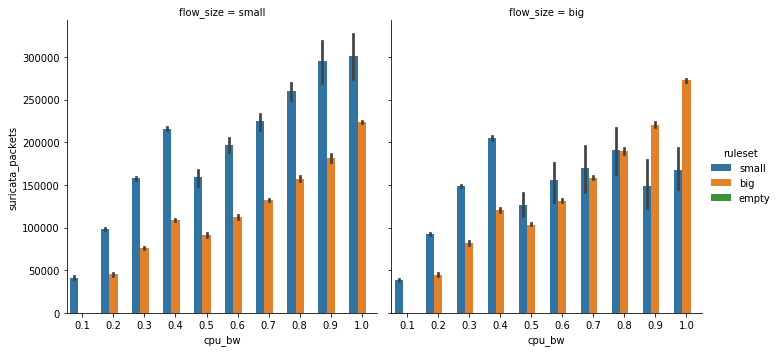

In [12]:
sns.catplot(data=df, x="cpu_bw", y="suricata_packets", hue="ruleset", col="flow_size", kind="bar")

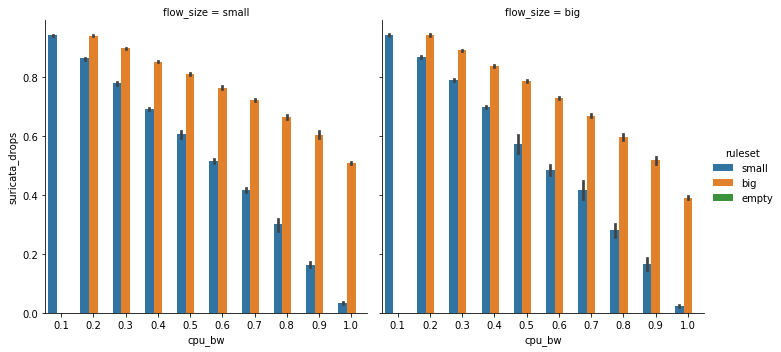

In [13]:
sns.catplot(data=df, x="cpu_bw", y="suricata_drops", hue="ruleset", col="flow_size", kind="bar")

## New Metrics (Suricate Eve after 2019-08-08)

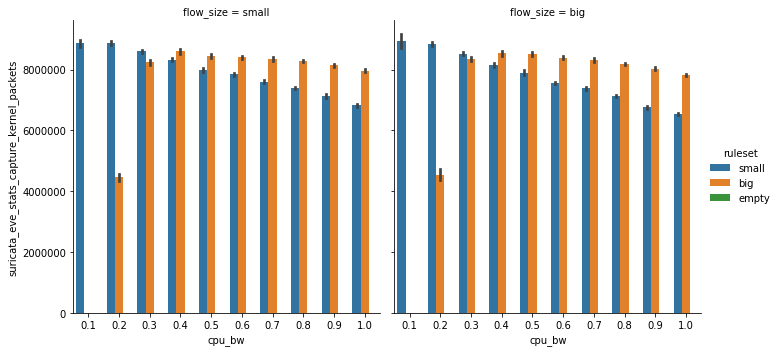

In [14]:
sns.catplot(data=df, x="cpu_bw", y="suricata_eve_stats_capture_kernel_packets", hue="ruleset", col="flow_size", kind="bar")

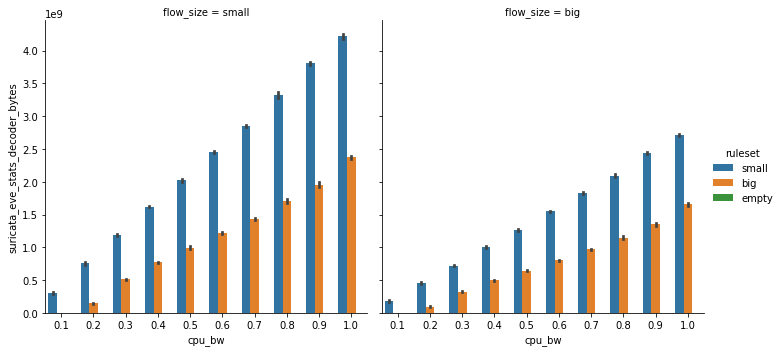

In [15]:
sns.catplot(data=df, x="cpu_bw", y="suricata_eve_stats_decoder_bytes", hue="ruleset", col="flow_size", kind="bar")

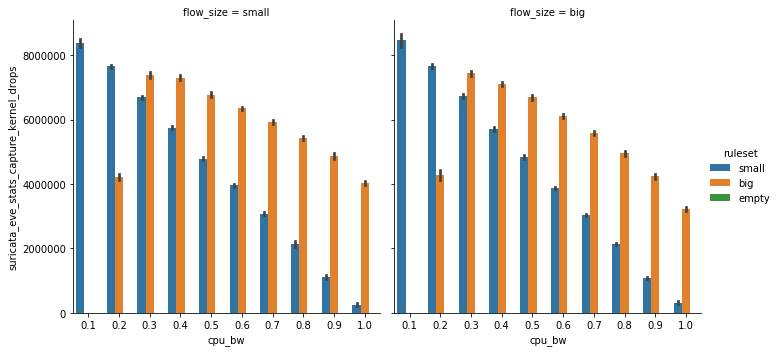

In [16]:
sns.catplot(data=df, x="cpu_bw", y="suricata_eve_stats_capture_kernel_drops", hue="ruleset", col="flow_size", kind="bar")